# Linear Regression


In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [21]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

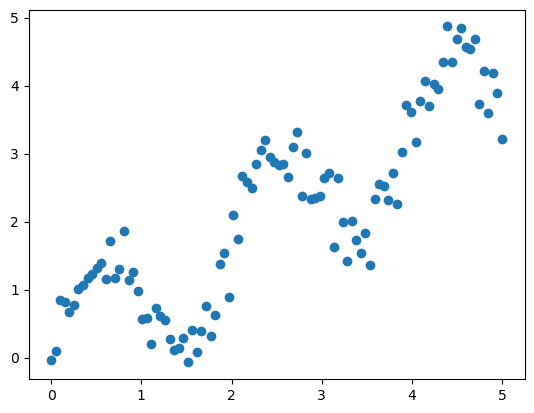

In [22]:
plt.scatter(x,y)

#### nonlinear

In [23]:
regr_lin = LinearRegression()

In [24]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [25]:
regr_lin.fit(X,y)

LinearRegression()

0.5497187257801381


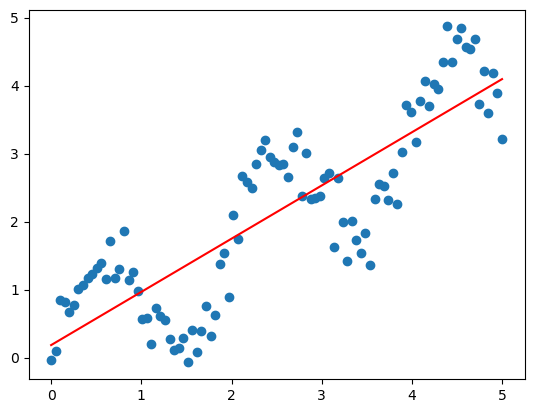

In [26]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [27]:
print(x.shape)

(100,)


In [28]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [29]:
regr_poly = LinearRegression()

In [30]:
regr_poly.fit(X_poly, y)#訓練

LinearRegression()

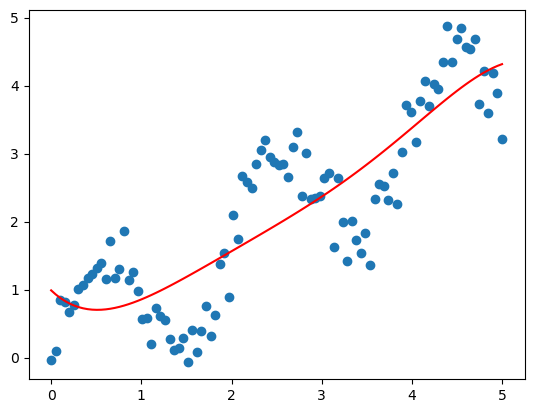

In [31]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [32]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.26973893  1.71191879 -0.70560643  0.14036592 -0.01044824]
interception:  0.9886049640487133


In [35]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b#矩陣相乘

array([0.98860496, 0.92875344, 0.87710258, 0.83313935, 0.7963718 ,
       0.76632866, 0.74255895, 0.72463152, 0.7121347 , 0.70467582,
       0.70188085, 0.70339398, 0.70887719, 0.71800983, 0.73048824,
       0.74602534, 0.76435016, 0.7852075 , 0.80835749, 0.83357514,
       0.86065   , 0.88938569, 0.91959951, 0.95112203, 0.98379668,
       1.01747933, 1.05203787, 1.08735182, 1.1233119 , 1.15981963,
       1.19678691, 1.23413561, 1.27179716, 1.30971213, 1.34782983,
       1.3861079 , 1.42451188, 1.46301481, 1.50159682, 1.54024471,
       1.57895155, 1.61771625, 1.65654317, 1.69544169, 1.73442579,
       1.77351369, 1.81272737, 1.85209219, 1.8916365 , 1.93139116,
       1.97138923, 2.01166546, 2.05225592, 2.0931976 , 2.13452799,
       2.17628465, 2.21850481, 2.26122496, 2.30448044, 2.34830502,
       2.3927305 , 2.43778629, 2.48349899, 2.52989198, 2.57698505,
       2.62479391, 2.67332984, 2.72259926, 2.77260331, 2.82333745,
       2.87479105, 2.92694695, 2.97978108, 3.03326203, 3.08735

In [36]:
regr_poly.predict(X_poly)

array([0.98860496, 0.92875344, 0.87710258, 0.83313935, 0.7963718 ,
       0.76632866, 0.74255895, 0.72463152, 0.7121347 , 0.70467582,
       0.70188085, 0.70339398, 0.70887719, 0.71800983, 0.73048824,
       0.74602534, 0.76435016, 0.7852075 , 0.80835749, 0.83357514,
       0.86065   , 0.88938569, 0.91959951, 0.95112203, 0.98379668,
       1.01747933, 1.05203787, 1.08735182, 1.1233119 , 1.15981963,
       1.19678691, 1.23413561, 1.27179716, 1.30971213, 1.34782983,
       1.3861079 , 1.42451188, 1.46301481, 1.50159682, 1.54024471,
       1.57895155, 1.61771625, 1.65654317, 1.69544169, 1.73442579,
       1.77351369, 1.81272737, 1.85209219, 1.8916365 , 1.93139116,
       1.97138923, 2.01166546, 2.05225592, 2.0931976 , 2.13452799,
       2.17628465, 2.21850481, 2.26122496, 2.30448044, 2.34830502,
       2.3927305 , 2.43778629, 2.48349899, 2.52989198, 2.57698505,
       2.62479391, 2.67332984, 2.72259926, 2.77260331, 2.82333745,
       2.87479105, 2.92694695, 2.97978108, 3.03326203, 3.08735

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [37]:
# normal distrubution
def RBF(x, center, sigma):#平均值和標準差
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [38]:
sigma = 0.3

In [39]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [40]:
regr_rbf = LinearRegression()

In [41]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

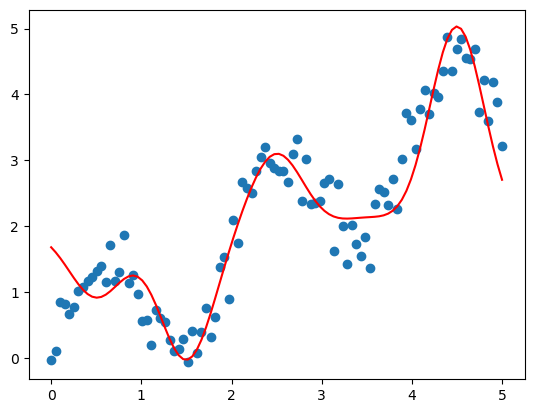

In [42]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [43]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.00959431 -1.96231465  1.17603711  0.18674012  3.10123763]
interception:  1.9294795478019333


#### Comparison

In [44]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

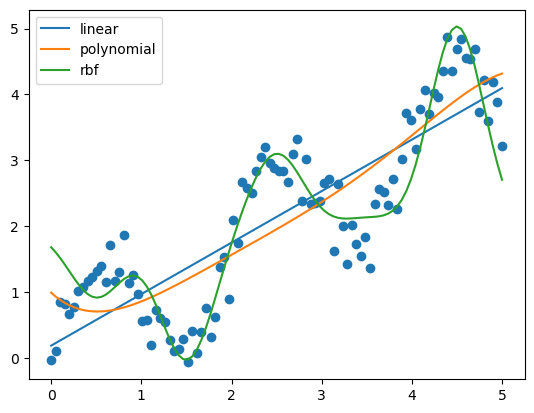

In [45]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [46]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5497187257801381


In [47]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.502796337782438


In [48]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.22077485863251156
